In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from tqdm import tqdm
from scipy.interpolate import interp1d

from interaction import LocalSystem, potential
import constants as const
import utility
import bind

plt.style.use('science')
gr = 4/3
h = 3

In [2]:
HBAR = 1.054572e-34
A0 = 5.291772e-11
ME = 9.109384e-31

In [3]:
def alpha(r):
    return 9/2 - 2/3*np.exp(-2*r) * (r**5 + 9/2*r**4 + 9*r**3 + 27/2*r**2 + 27/2*r + 27/4)
def mm_potential(r):
    return -1/2 * alpha(r) / r**4

In [16]:
R = const.BETA4/16
ls = LocalSystem(R)

In [19]:
NUM_SWAVE_STATES = 7
Rs = np.linspace(R, R/4, 50)

In [28]:
mm_evals[0]

-0.00012026875019141292

In [35]:
guess = -0.05875
ls.bound_state_spectrum(guess, 0)

array([-0.00012013, -0.00158291, -0.00620727, -0.01411863, -0.02653946,
       -0.04145109, -0.05462118])

In [36]:
def f(g, ls):
    return (mm_evals[0] - ls.bound_state_spectrum(g, 0)[0]) / mm_evals[0]

In [37]:
f(guess, ls)

0.0011494101064695539

In [38]:
spectra = []
gs = np.array([])

for (i, R) in enumerate(Rs):
    ls = LocalSystem(R)
    result = optimize.fsolve(f, guess, args=(ls), factor=0.01)
    g = result[0]
    spectrum = ls.bound_state_spectrum(g, 0)
    n = spectrum.size
    print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
    if n != NUM_SWAVE_STATES or np.abs(f(g, ls)) > 1e-3:
        break
    spectra.append(spectrum)
    gs = np.append(gs, g)
    if i >= 5:
        func = interp1d(Rs[:i], gs[:i], kind='cubic', fill_value='extrapolate')
        guess = func(R)
    else:
        guess = g

R = 2.04  g = -5.88e-02  guess = -5.87e-02  N = 7  GS = -0.0546
R = 2.01  g = -5.79e-02  guess = -5.88e-02  N = 7  GS = -0.0542
R = 1.98  g = -5.69e-02  guess = -5.79e-02  N = 7  GS = -0.0537
R = 1.95  g = -5.58e-02  guess = -5.69e-02  N = 7  GS = -0.0532
R = 1.92  g = -5.45e-02  guess = -5.58e-02  N = 7  GS = -0.0527
R = 1.89  g = -5.30e-02  guess = -5.45e-02  N = 7  GS = -0.0522
R = 1.86  g = -5.14e-02  guess = -5.30e-02  N = 7  GS = -0.0517
R = 1.83  g = -4.96e-02  guess = -5.14e-02  N = 7  GS = -0.0513
R = 1.79  g = -4.75e-02  guess = -4.96e-02  N = 7  GS = -0.0510
R = 1.76  g = -4.53e-02  guess = -4.75e-02  N = 7  GS = -0.0510
R = 1.73  g = -4.28e-02  guess = -4.53e-02  N = 7  GS = -0.0512
R = 1.70  g = -4.00e-02  guess = -4.28e-02  N = 7  GS = -0.0517
R = 1.67  g = -3.70e-02  guess = -4.00e-02  N = 7  GS = -0.0525
R = 1.64  g = -3.37e-02  guess = -3.70e-02  N = 7  GS = -0.0539
R = 1.61  g = -3.02e-02  guess = -3.37e-02  N = 7  GS = -0.0557
R = 1.57  g = -2.65e-02  guess = -3.02e-

In [39]:
i, R

(20, 1.4185412723220445)

In [40]:
guess = interp1d(Rs[:i], gs[:i], kind='cubic', fill_value='extrapolate')(R)

In [45]:
for i in range(i, Rs.size):
    R = Rs[i]
    guess = func(R)
    ls = LocalSystem(R)
    result = optimize.fsolve(f, guess, args=(ls), factor=0.01)
    g = result[0]
    spectrum = ls.bound_state_spectrum(g, 0)
    n = spectrum.size
    print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
    if n != NUM_SWAVE_STATES or np.abs(f(g, ls)) > 1e-3:
        break
    spectra.append(spectrum)
    gs = np.append(gs, g)
    if i >= 5:
        func = interp1d(Rs[:i], gs[:i], kind='cubic', fill_value='extrapolate')
    else:
        guess = g

R = 1.42  g = -1.80e-03  guess = -2.49e-03  N = 7  GS = -0.0784
R = 1.39  g = 6.66e-03  guess = 5.75e-03  N = 7  GS = -0.0841
R = 1.36  g = 1.81e-02  guess = 1.70e-02  N = 7  GS = -0.0904
R = 1.32  g = 3.40e-02  guess = 3.26e-02  N = 7  GS = -0.0972
R = 1.29  g = 5.60e-02  guess = 5.45e-02  N = 7  GS = -0.1045
R = 1.26  g = 8.66e-02  guess = 8.47e-02  N = 7  GS = -0.1124
R = 1.23  g = 1.30e-01  guess = 1.26e-01  N = 7  GS = -0.1211
R = 1.20  g = 1.90e-01  guess = 1.84e-01  N = 7  GS = -0.1304
R = 1.17  g = 2.79e-01  guess = 2.68e-01  N = 7  GS = -0.1406
R = 1.14  g = 4.11e-01  guess = 3.91e-01  N = 7  GS = -0.1516
R = 1.11  g = 6.16e-01  guess = 5.80e-01  N = 7  GS = -0.1634
R = 1.07  g = 9.48e-01  guess = 8.78e-01  N = 7  GS = -0.1759
R = 1.04  g = 1.51e+00  guess = 1.37e+00  N = 7  GS = -0.1889
R = 1.01  g = 2.53e+00  guess = 2.23e+00  N = 7  GS = -0.2024
R = 0.98  g = 4.49e+00  guess = 3.81e+00  N = 7  GS = -0.2161
R = 0.95  g = 8.58e+00  guess = 6.91e+00  N = 7  GS = -0.2299
R = 0.

In [46]:
i, R

(38, 0.8552969436059388)

In [56]:
guess = interp1d(Rs[:i], gs, kind='cubic', fill_value='extrapolate')(R)

In [57]:
guess

array(91.77673955)

In [59]:
for i in range(i, Rs.size):
    R = Rs[i]
    guess = interp1d(Rs[:i], gs[:i], kind='cubic', fill_value='extrapolate')(R)
    ls = LocalSystem(R)
    result = optimize.fsolve(f, guess, args=(ls), factor=0.01)
    g = result[0]
    spectrum = ls.bound_state_spectrum(g, 0)
    n = spectrum.size
    print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
    if n != NUM_SWAVE_STATES or np.abs(f(g, ls)) > 1e-3:
        break
    spectra.append(spectrum)
    gs = np.append(gs, g)

R = 0.86  g = 1.13e+02  guess = 9.18e+01  N = 7  GS = -0.2692
R = 0.82  g = 3.60e+02  guess = 2.68e+02  N = 7  GS = -0.2808
R = 0.79  g = 1.42e+03  guess = 9.36e+02  N = 7  GS = -0.2913
R = 0.76  g = 7.26e+03  guess = 4.04e+03  N = 7  GS = -0.3004
R = 0.73  g = 5.20e+04  guess = 2.27e+04  N = 7  GS = -0.3082
R = 0.70  g = -1.68e+05  guess = 1.78e+05  N = 32  GS = -168155.7198


In [60]:
i, R

(43, 0.6988401856292428)

In [67]:
guess = np.exp(interp1d(Rs[i-10:i], np.log(gs[-10:]), kind='cubic', fill_value='extrapolate')(R))

In [68]:
guess

558971.480827039

In [72]:
for i in range(i, Rs.size):
    R = Rs[i]
    guess = np.exp(interp1d(Rs[i-10:i], np.log(gs[-10:]), kind='cubic', fill_value='extrapolate')(R))
    ls = LocalSystem(R)
    result = optimize.fsolve(f, guess, args=(ls), factor=0.01)
    g = result[0]
    spectrum = ls.bound_state_spectrum(g, 0)
    n = spectrum.size
    print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
    if n != NUM_SWAVE_STATES or np.abs(f(g, ls)) > 1e-3:
        break
    spectra.append(spectrum)
    gs = np.append(gs, g)

R = 0.70  g = 5.69e+05  guess = 5.59e+05  N = 7  GS = -0.3145
R = 0.67  g = 1.04e+07  guess = 1.04e+07  N = 8  GS = -0.3199


In [113]:
?np.log

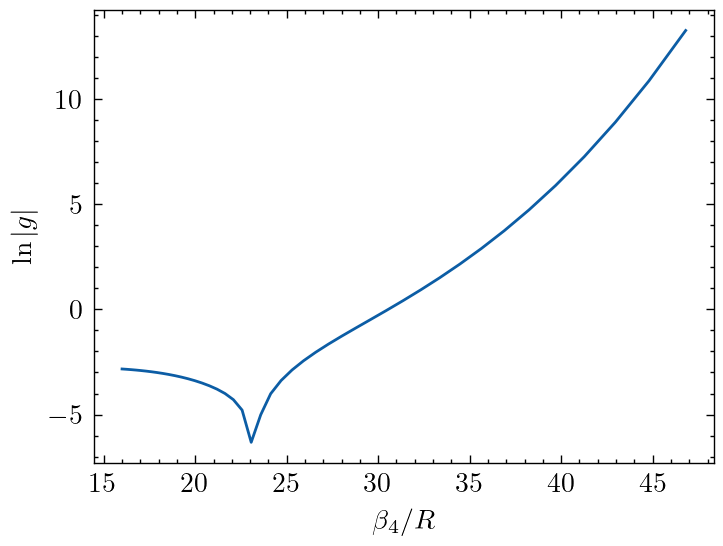

In [84]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(const.BETA4/Rs[:i], np.log(np.abs(gs)))

ax.set_xlabel(r'$\beta_4/R$')
ax.set_ylabel(r'$\ln |g|$')

plt.savefig('notes/figures/rg_flow.pdf');

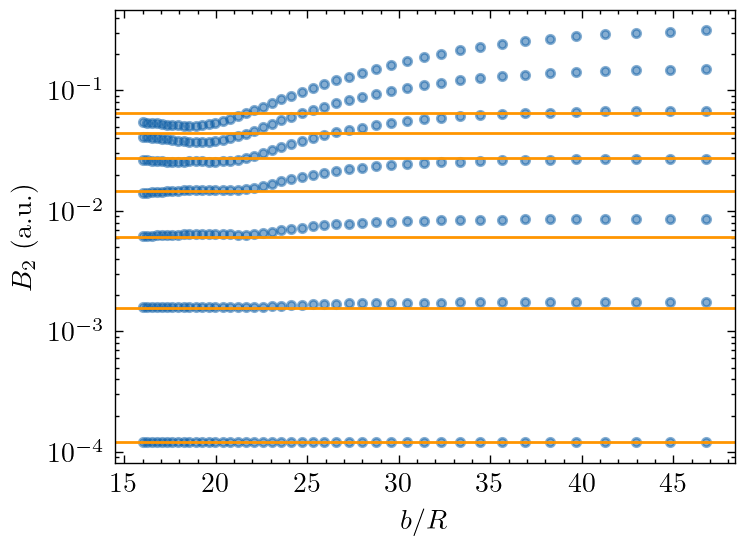

In [85]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for (R, s) in zip(Rs, spectra):
    for state in s:
        ax.scatter(const.BETA4/R, np.abs(state), marker='.', color='C0', alpha=0.5)

for s in mm_evals:
    ax.axhline(np.abs(s), color='C2')

ax.set_yscale('log')
ax.set_ylabel(r'$B_2$ (a.u.)')
ax.set_xlabel(r'$b/R$')

plt.savefig('notes/figures/B2s.pdf');

In [173]:
const.BETA4/22

1.4868133121664209

In [98]:
stop = gs.size

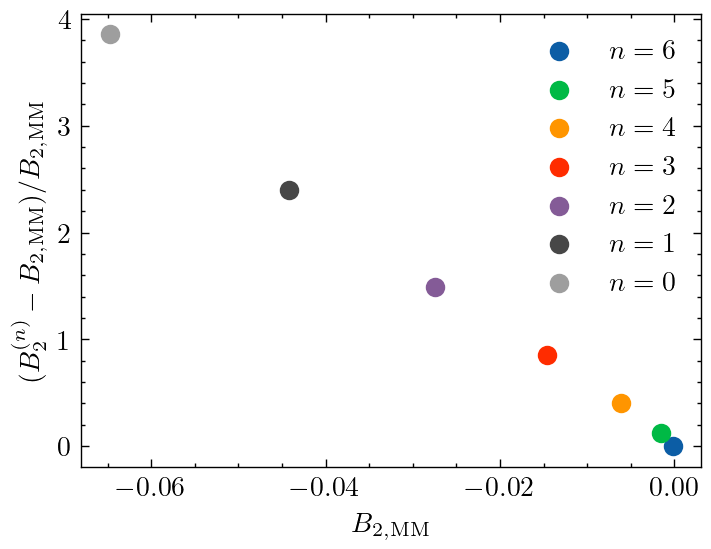

In [115]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for (i, (e2, e2_mm)) in enumerate(zip(np.array(spectra)[-1, :], mm_evals)):
    ax.scatter(e2_mm, (e2-e2_mm)/e2_mm, color=f'C{i}', label=r'$n=%d$' % (6-i))

ax.set_xlabel(r'$B_{2,{\rm MM}}$')
ax.set_ylabel(r'$(B_2^{(n)} - B_{2,{\rm MM}}) / B_{2,{\rm MM}}$')
ax.legend()

plt.savefig('notes/figures/B2_rel_diffs.pdf');

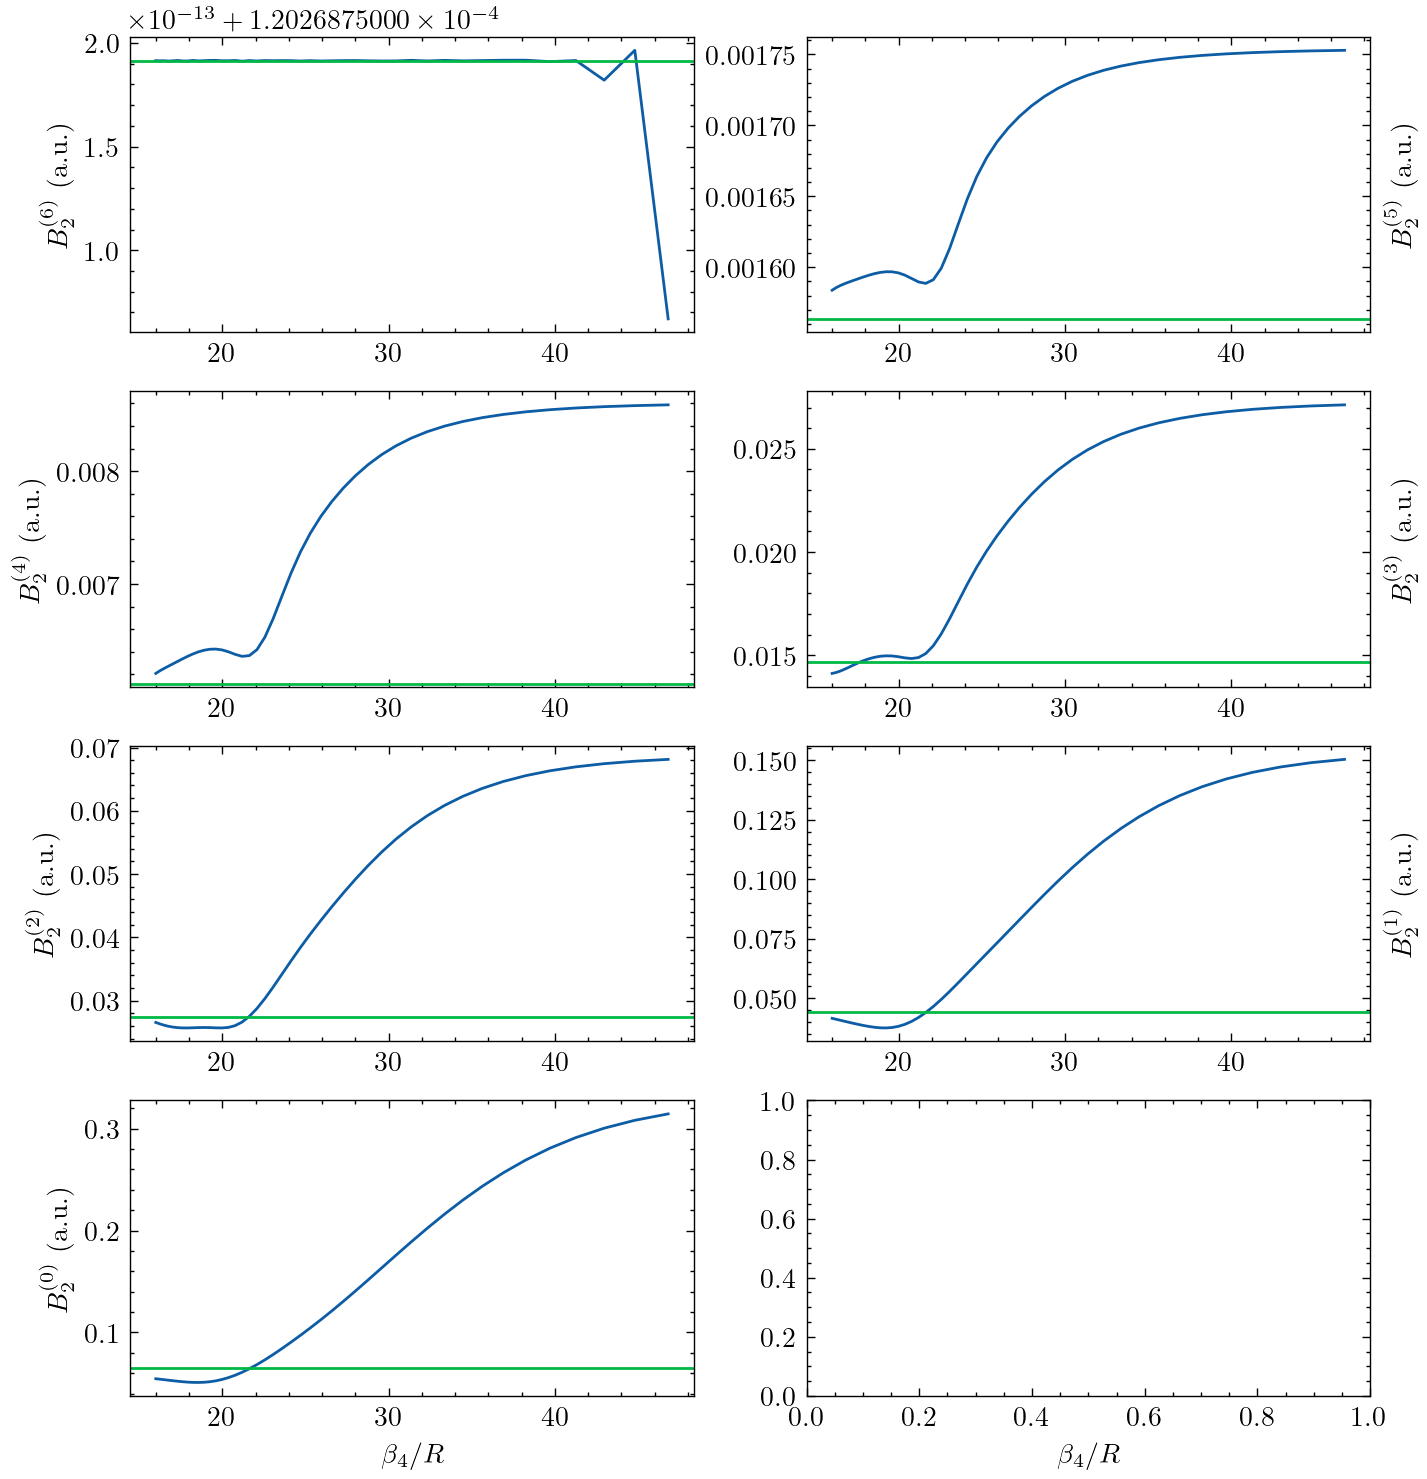

In [104]:
fig, ax = plt.subplots(4, 2, figsize=(2*gr*h, 3*h), dpi=200)
fig.patch.set_facecolor('white')

for j in range(7):
    ax_sub = ax[j//2, j%2]
    ax_sub.plot(const.BETA4/Rs[:stop], -np.array(spectra)[:, j])
    ax_sub.axhline(-mm_evals[j], color='C1')
    if j % 2 == 1:
        ax_sub.yaxis.set_label_position('right')
    ax_sub.set_ylabel(r'$B_2^{(%d)}$ (a.u.)' % (6-j))
ax[3, 0].set_xlabel(r'$\beta_4/R$')
ax[3, 1].set_xlabel(r'$\beta_4/R$')

plt.savefig('notes/figures/B2_panels.pdf');

In [107]:
np.savetxt('rgflow_local_B6_fix.txt', np.vstack((Rs[:stop], gs)).T)

In [108]:
np.savetxt('spectra_local_B6_fix.txt', np.array(spectra))

In [169]:
data = np.vstack((Rs[:stop], np.array(spectra).T)).T
ii = np.where(const.BETA4/data[:, 0] > 30)[0]
data = data[ii, :]

In [170]:
asymp_values = []

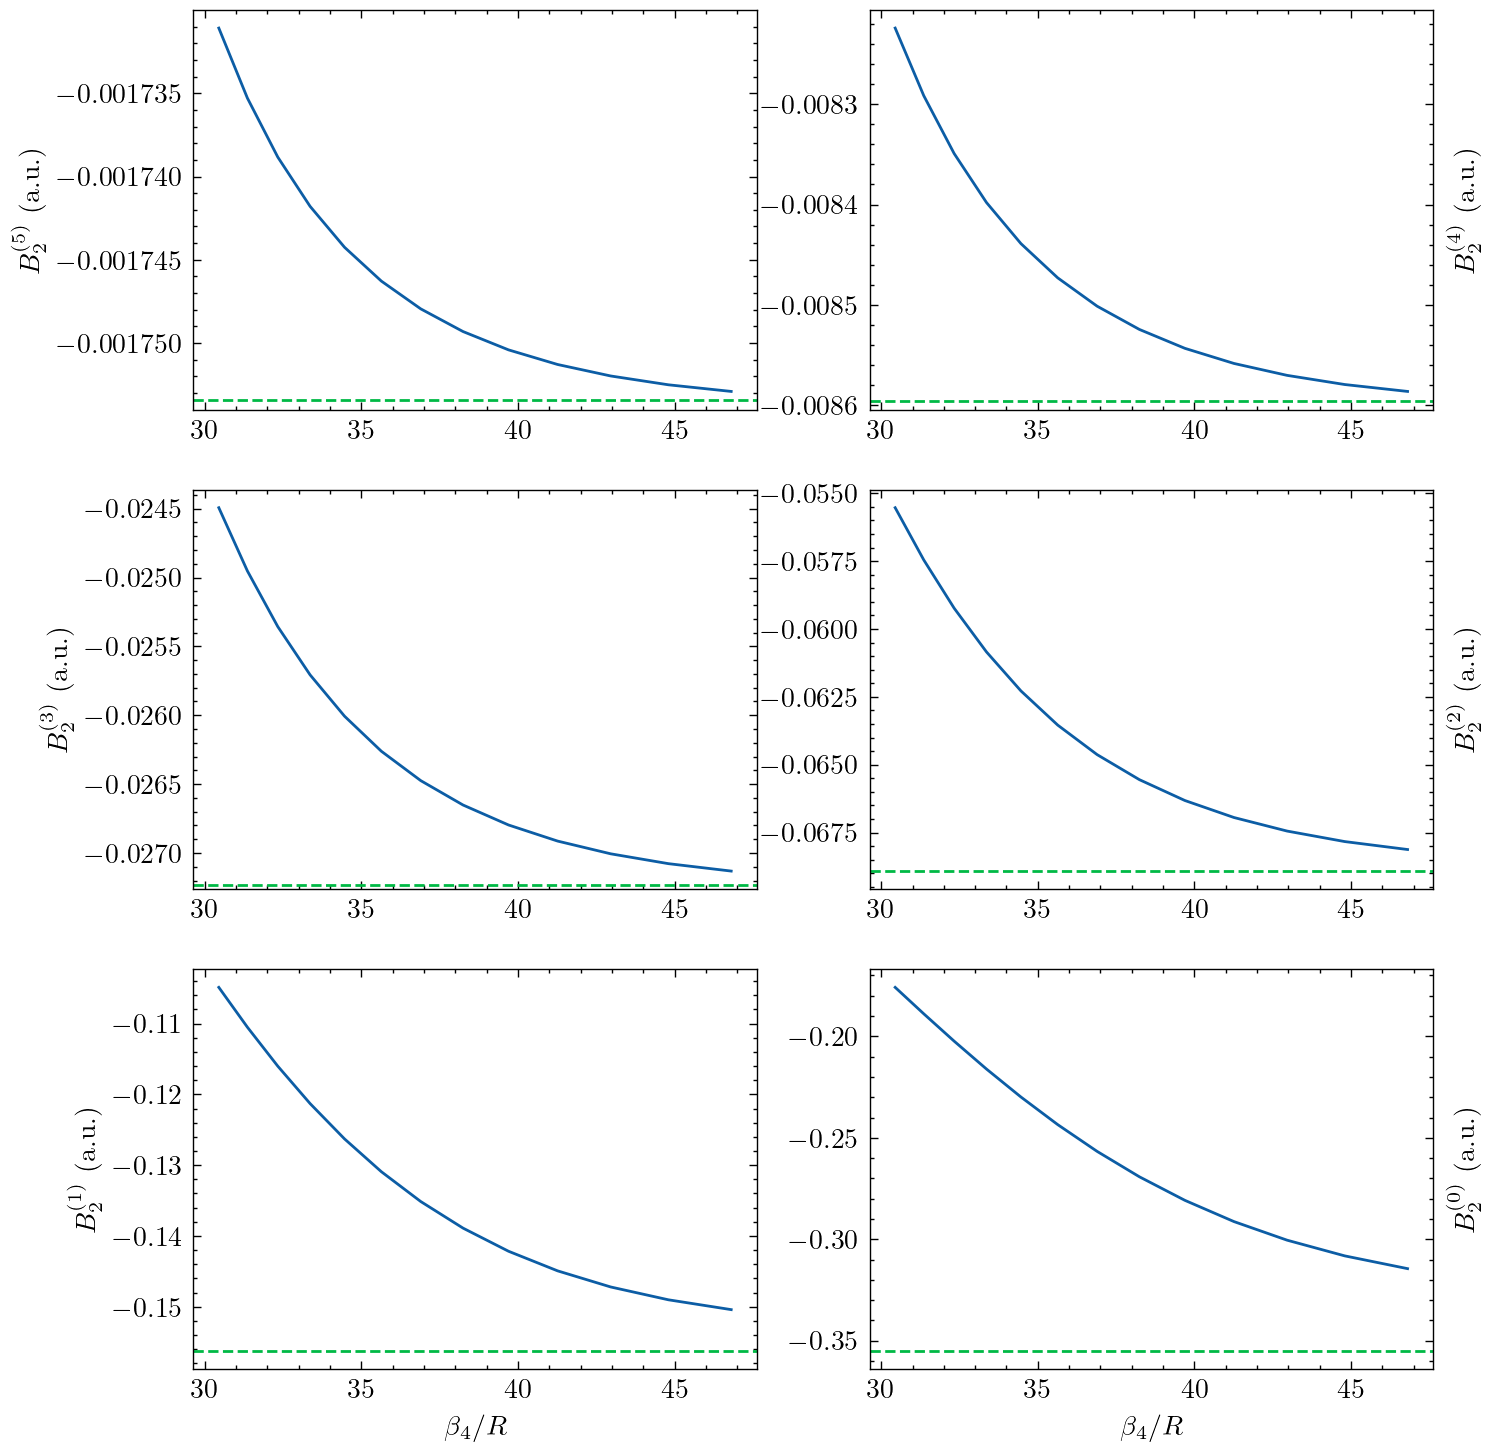

In [171]:
fig, ax = plt.subplots(3, 2, figsize=(2*gr*h, 3*h), dpi=200)
fig.patch.set_facecolor('white')

for i in range(2, 8):
    j = i-2
    
    x, y = const.BETA4/data[:, 0], data[:, i]
    pars, cov = optimize.curve_fit(lambda x, a, b, c: a + b*np.exp(-c*x), x, y, p0=[mm_evals[i-1], 1, 0.1])
    asymp_values.append(pars[0])
    
    ax[j//2, j%2].plot(const.BETA4/data[:, 0], data[:, i])
    ax[j//2, j%2].axhline(pars[0], color='C1', linestyle='--')
    
    if j % 2 == 1:
        ax[j//2, j%2].yaxis.set_label_position('right')
    ax[j//2, j%2].set_ylabel(r'$B_2^{(%d)}$ (a.u.)' % (7-i))
    
ax[2, 0].set_xlabel(r'$\beta_4/R$')
ax[2, 1].set_xlabel(r'$\beta_4/R$')

plt.savefig('notes/figures/B2_convergence_panels.pdf');

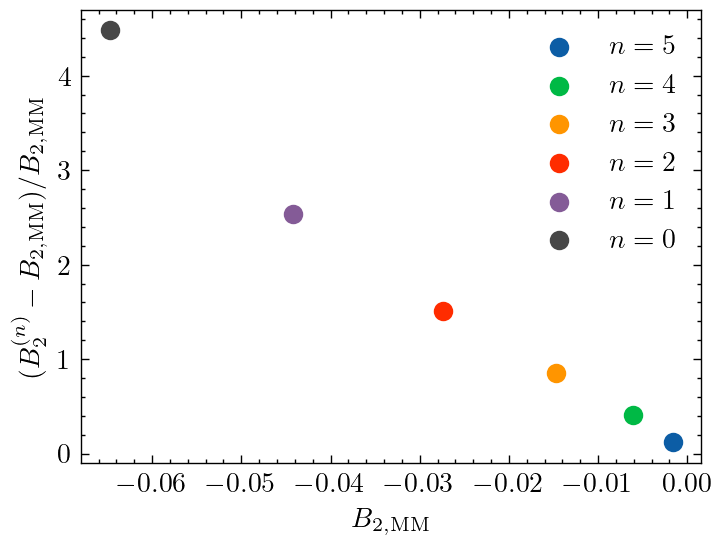

In [172]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for (i, (e2, e2_mm)) in enumerate(zip(asymp_values, mm_evals[1:])):
    ax.scatter(e2_mm, (e2-e2_mm)/e2_mm, color=f'C{i}', label=r'$n=%d$' % (5-i))

ax.set_xlabel(r'$B_{2,{\rm MM}}$')
ax.set_ylabel(r'$(B_2^{(n)} - B_{2,{\rm MM}}) / B_{2,{\rm MM}}$')
ax.legend()

plt.savefig('notes/figures/B2_rel_diffs.pdf');